<a href="https://colab.research.google.com/github/mirpouya/Machine-Learning-Intro/blob/main/Machine_Learning_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# using sample generator to explore ML

from sklearn.datasets import make_blobs

In [31]:
# lets generate some datasets
# 100 samples in 3 classes
X, y = make_blobs(n_samples=100, centers=3)

In [32]:
# shape of X and y

print(f" X shape is : {X.shape}\n y shape is : {y.shape}")

 X shape is : (100, 2)
 y shape is : (100,)


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [34]:
# type of X, y
type(X)

numpy.ndarray

In [35]:
X[10]

array([-7.62456277,  2.09269185])

In [36]:
y[10]

1

In [37]:
np.unique(y)

array([0, 1, 2])

In [38]:
# real dataset

iris_data = sns.load_dataset("iris")
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [39]:
iris_data.shape

(150, 5)

In [40]:
iris_data.iloc[55:60,:]

,sepal_length,sepal_width,petal_length,petal_width,species
55,5.7,2.8,4.5,1.3,versicolor
56,6.3,3.3,4.7,1.6,versicolor
57,4.9,2.4,3.3,1.0,versicolor
58,6.6,2.9,4.6,1.3,versicolor
59,5.2,2.7,3.9,1.4,versicolor


In [41]:
# working with real data

data = pd.read_csv("/content/bias_correction.csv")
data.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30/06/2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30/06/2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30/06/2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30/06/2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30/06/2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [42]:
data.shape

(7752, 25)

**<h2> Regression </h2>

In [43]:
# generate a synthetic data

X = np.arange(20)
y = 3*(X**2) + 4*X

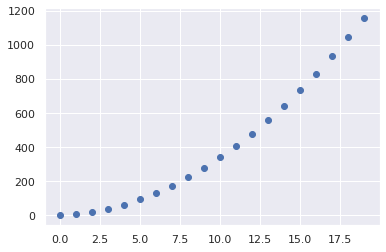

In [44]:
# visualizing y according to X
plt.scatter(X,y)

In [45]:
# import Linear Regression

from sklearn.linear_model import LinearRegression

In [46]:
model = LinearRegression()
model.fit(X[:,np.newaxis], y)   # .fit() requires data in two dimensions so we add np.newaxis to the data

LinearRegression()

In [47]:
# making predictions
y_pred = model.predict(X[:,np.newaxis])

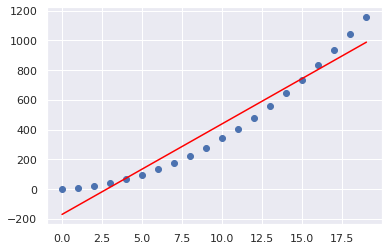

In [48]:
# comparing predictions and the actual values

plt.scatter(X,y)
plt.plot(X, y_pred, color="red")

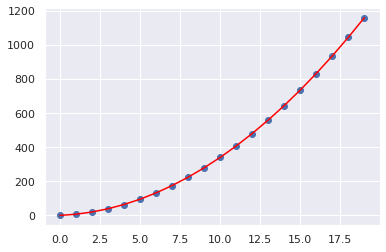

In [49]:
# let's make the model more flexible to fit to plynomial data

from sklearn.preprocessing import PolynomialFeatures

# now I want to transform my features

# defining a polynomial model with dgree of 2
poly_model = PolynomialFeatures(2)

# transformed features
X_poly = poly_model.fit_transform(X[:,np.newaxis])

# fitting the linear regression model to the new transformed polynomial features
model_p = LinearRegression()

model_p.fit(X_poly[:np.newaxis],y)

y_pred_poly = model_p.predict(X_poly)

# comparing predictions and actual values
plt.scatter(X,y)
plt.plot(X,y_pred_poly, color="red")

In [50]:
# what are the coeficients according to the model predicitons

model_p.coef_

array([0., 4., 3.])

**<h2> Classification </h2>**

In [51]:
# iris dataset
X = sns.load_dataset("iris")
X.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [52]:
# seperate target

y = X.species
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [53]:
# remove target column from X

X.drop(["species"], axis=1, inplace=True)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [54]:
# working with SVM classifier

from sklearn.svm import SVC

In [55]:
model = SVC(gamma="auto")

model.fit(X,y)

SVC(gamma='auto')

In [56]:
# predicting classes

y_pred = model.predict(X)
y_pred

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica

In [57]:
# how many of the samples is labeled correctly
print(f" y shape is : {y.shape}\n number of correct predictions : {np.count_nonzero(y_pred == y)} ")

 y shape is : (150,)
 number of correct predictions : 148 


**<h2> Clustering </h2>**

In [62]:
# Generating synthetic data

X, y = make_blobs(n_samples=500, centers=5) # to ensure centers are separated enough we have to set "cluster_std=..." to a low value

print(f" X shape is : {X.shape}\n y shape is : {y.shape}")

 X shape is : (500, 2)
 y shape is : (500,)


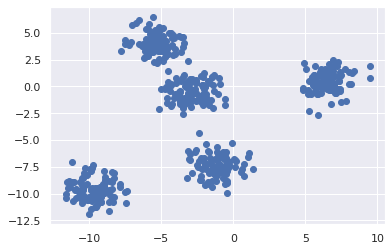

In [63]:
# visualizing data
plt.scatter(X[:,0], X[:,1])

In [64]:
# K-MEANS is a clustering algorithm

from sklearn.cluster import KMeans

In [65]:
kmeans = KMeans(n_clusters=5)   # specifying how many cluster we want to assume

kmeans.fit(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

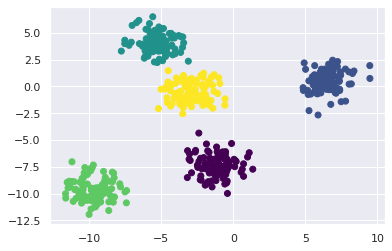

In [66]:
# predictions

y_pred = kmeans.predict(X)

# visualizing predictions with different colors
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap="viridis")   # c=ypred : category based on y_pred

**<h2> Data Encoding and Preprocessing </h2>**

In [68]:
# how text data can be converted to numeric form

# reading ault data

adult_data = pd.read_csv(r"/content/adult data.data")

In [69]:
adult_data.shape

(25566, 15)

In [70]:
adult_data.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
1,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
2,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
3,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
4,37,Private,284582.0,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K


In [95]:
# as you see the first sample is shown as heading
# to avoid that: 

adult_data = pd.read_csv(r"/content/adult data.data", header=None)

In [96]:
adult_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [97]:
# one way of changing categorical data to numerical is one-hot encoding
# one-hot encoding on column 1 (private job or government job)

x = pd.get_dummies(adult_data, columns=[1])

x.head()

,0,2,3,4,5,6,7,8,9,10,...,14,1_ ?,1_ Federal-gov,1_ Local-gov,1_ Never-worked,1_ Private,1_ Self-emp-inc,1_ Self-emp-not-inc,1_ State-gov,1_ Without-pay
0,39,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,...,<=50K,0,0,0,0,0,0,0,1,0
1,50,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,...,<=50K,0,0,0,0,0,0,1,0,0
2,38,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,...,<=50K,0,0,0,0,1,0,0,0,0
3,53,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,...,<=50K,0,0,0,0,1,0,0,0,0
4,28,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,...,<=50K,0,0,0,0,1,0,0,0,0


In [103]:
y = x.iloc[:,3]

In [104]:
y

0        13.0
1        13.0
2         9.0
3         7.0
4        13.0
         ... 
25562     9.0
25563     9.0
25564     8.0
25565    10.0
25566     NaN
Name: 4, Length: 25567, dtype: float64

In [106]:
np.unique(y)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., nan])

In [129]:
y = x.loc[0:25565:,6]
y

0              Adm-clerical
1           Exec-managerial
2         Handlers-cleaners
3         Handlers-cleaners
4            Prof-specialty
                ...        
25561                 Sales
25562       Exec-managerial
25563          Adm-clerical
25564          Adm-clerical
25565          Adm-clerical
Name: 6, Length: 25566, dtype: object

In [130]:
np.unique(y)

array([' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving'], dtype=object)

In [133]:
x.loc[25566,6]

nan

In [134]:
y = x.loc[0:25565:,14]
np.unique(y)

array([' <=50K', ' >50K'], dtype=object)

In [135]:
# something goes wrong when I include row 25566!

In [136]:
col_14_vals = np.unique(x.loc[0:25565:,14])

indx = x.loc[0:25565:,14] == col_14_vals[0]
indx

0        True
1        True
2        True
3        True
4        True
         ... 
25561    True
25562    True
25563    True
25564    True
25565    True
Name: 14, Length: 25566, dtype: bool

In [137]:
np.unique(indx)

array([False,  True])

In [147]:
x.drop(25566, axis=0, inplace=True)
x

,0,2,3,4,5,6,7,8,9,10,...,14,1_ ?,1_ Federal-gov,1_ Local-gov,1_ Never-worked,1_ Private,1_ Self-emp-inc,1_ Self-emp-not-inc,1_ State-gov,1_ Without-pay
0,39,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,...,<=50K,0,0,0,0,0,0,0,1,0
1,50,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,...,<=50K,0,0,0,0,0,0,1,0,0
2,38,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,...,<=50K,0,0,0,0,1,0,0,0,0
3,53,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,...,<=50K,0,0,0,0,1,0,0,0,0
4,28,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,...,<=50K,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25561,24,162312.0,HS-grad,9.0,Never-married,Sales,Own-child,Asian-Pac-Islander,Male,0.0,...,<=50K,0,0,0,0,1,0,0,0,0
25562,45,72844.0,HS-grad,9.0,Divorced,Exec-managerial,Not-in-family,White,Female,0.0,...,<=50K,0,0,0,0,1,0,0,0,0
25563,49,206947.0,HS-grad,9.0,Divorced,Adm-clerical,Not-in-family,White,Female,0.0,...,<=50K,0,0,0,0,1,0,0,0,0
25564,19,64112.0,12th,8.0,Never-married,Adm-clerical,Not-in-family,White,Female,0.0,...,<=50K,0,0,0,0,1,0,0,0,0


In [148]:
x.shape[0]

25566

In [149]:
indx.shape

(25566,)

In [153]:
indx

0        True
1        True
2        True
3        True
4        True
         ... 
25561    True
25562    True
25563    True
25564    True
25565    True
Name: 14, Length: 25566, dtype: bool

In [154]:
x.loc[indx==True,14] = 0

In [161]:
np.unique(x.loc[:,14])

TypeError: ignored

In [162]:
# I don't know what the fuuuuuuck is this errrrrorrr!
# fuck this bitch!

In [163]:
# standardization 

from sklearn.preprocessing import StandardScaler   # set mean to 0 and std to 1

In [164]:
# synthetic data

X = 7*np.random.rand(200,4) + 60
X

array([[63.27326726, 66.62904323, 63.44560841, 60.927916  ],
       [65.36923035, 60.52321974, 66.69999003, 60.83740546],
       [63.52839667, 63.31066719, 63.92750309, 64.82227443],
       [66.42532701, 66.50882043, 60.31546331, 66.90850342],
       [62.79734169, 62.2782625 , 65.81136689, 62.35007022],
       [63.24414717, 60.81212101, 61.56109222, 66.57323012],
       [61.90634461, 60.8917998 , 66.80844669, 63.20471394],
       [60.88757709, 66.36451157, 64.97216538, 60.8339326 ],
       [60.32998329, 60.50484686, 62.79654904, 61.9708973 ],
       [61.7555475 , 64.27026497, 62.96089724, 65.77163803],
       [66.28279905, 66.07883458, 65.63452564, 63.11443679],
       [61.73599136, 66.24717725, 61.07274489, 66.10042303],
       [60.3034193 , 62.01567975, 65.19641849, 61.41907605],
       [62.45167821, 65.27933695, 65.66166571, 65.88791586],
       [60.2812517 , 63.77484606, 60.15135408, 60.19730907],
       [62.90587888, 66.85904399, 62.05001781, 63.16110316],
       [62.95872835, 64.

In [165]:
# center of each attribute

X.mean(axis=0)

array([63.26016627, 63.63163052, 63.29565793, 63.32421464])

In [168]:
# standard deviation of each attribute

X.std(axis=0)

array([1.89205085, 2.13636438, 1.95511966, 1.94007773])

In [169]:
# standardizing X

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [170]:
X_scaled.mean(axis=0)

array([ 1.05399023e-14, -2.88657986e-17,  5.30575583e-15, -9.81992265e-15])

In [171]:
# numerically these values are very small and almost zero

In [172]:
X_scaled.std(axis=0)

array([1., 1., 1., 1.])

**<h2> Model </h2>**

**Model is a function in the feature space**

**Dminesion**: NUMBER OF FEATURES <br>
**Parameters** <br>
**Hyperparameters**

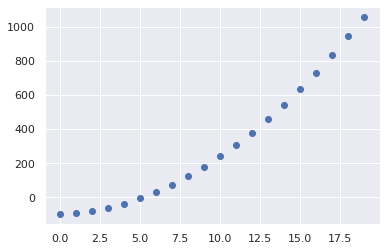

In [173]:
# Linear Regression

n = 20
X = np.arange(n)
y = 3*(X**2) + 4*X - 100
plt.scatter(X,y)